Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [43]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

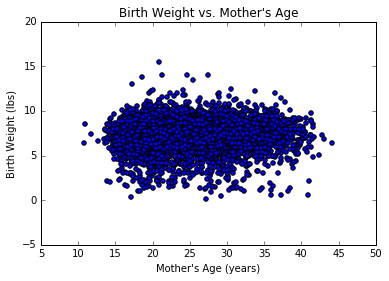

In [44]:
import thinkstats2
import numpy as np
import matplotlib.pyplot as plt
import nsfg
df = nsfg.ReadFemPreg()
df = df.dropna(subset=['agepreg', 'totalwgt_lb'])

plt.scatter(df.agepreg, df.totalwgt_lb)
plt.title("Birth Weight vs. Mother's Age")
plt.xlabel("Mother's Age (years)")
plt.ylabel('Birth Weight (lbs)')

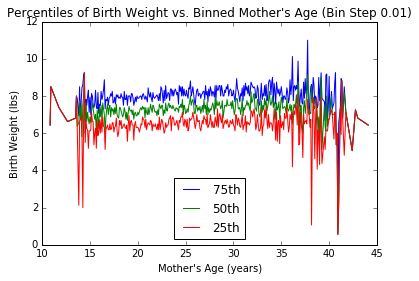

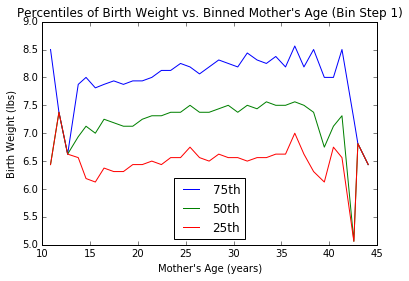

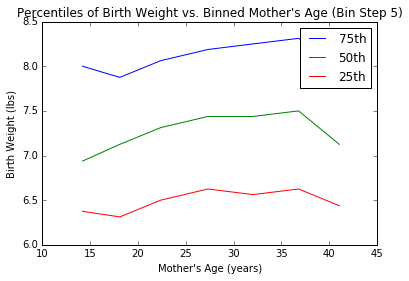

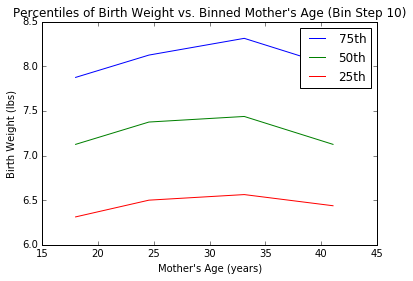

In [45]:
def plotPercentiles(df, bin_step=1):
    """
    Bin mother's age and plot percentiles of birth weight
    """
    bins = np.arange(10, 45, bin_step)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
    labels = []
    plt.figure()
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        plt.plot(ages, weights)
        labels.append('{}th'.format(percent))
    plt.legend(labels, loc=0)
    plt.title("Percentiles of Birth Weight vs. Binned Mother's Age (Bin Step {})".format(bin_step))
    plt.xlabel("Mother's Age (years)")
    plt.ylabel('Birth Weight (lbs)')

plotPercentiles(df, 0.01)  # Ages are recorded to the thousandth, so this is the smallest binning possible
plotPercentiles(df, 1)
plotPercentiles(df, 5)
plotPercentiles(df, 10)

The prompt here didn't mention binning the mother's age, but the example in ThinkStats of plotting percentiles binned the x-axis values and I couldn't figure out a way to plot percentiles without binning.  So, I took this opportunity to explore the effect of bin size on the plots produced.

In [46]:
pearson_corr = thinkstats2.Corr(df.agepreg, df.totalwgt_lb)
spearman_corr = thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)
print "Pearson's:\t", pearson_corr
print "Spearman's:\t", spearman_corr

Pearson's:	0.0688339703541
Spearman's:	0.0946100410966


Both the Pearson's and Spearman's correlation values are less than 0.1 in magnitude, indicating that mother's age and birth weight are not very correlated.  The scatter and percentile plots verify this conclusion; there is no strong connection between the two variables.